In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report , confusion_matrix
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.rename(columns={'Marital.Status':'MaritalStatus',
                  'Taxable.Income':'TaxableIncome',
                  'City.Population':'CityPopulation',
                  'Work.Experience': 'WorkExperience'},inplace=True)
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# target column
Given: treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [4]:
df['Target']=df['TaxableIncome'].apply(lambda x: 'Risky' if x <= 30000 else"Good")
df

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


# Visualization

<AxesSubplot:xlabel='WorkExperience', ylabel='TaxableIncome'>

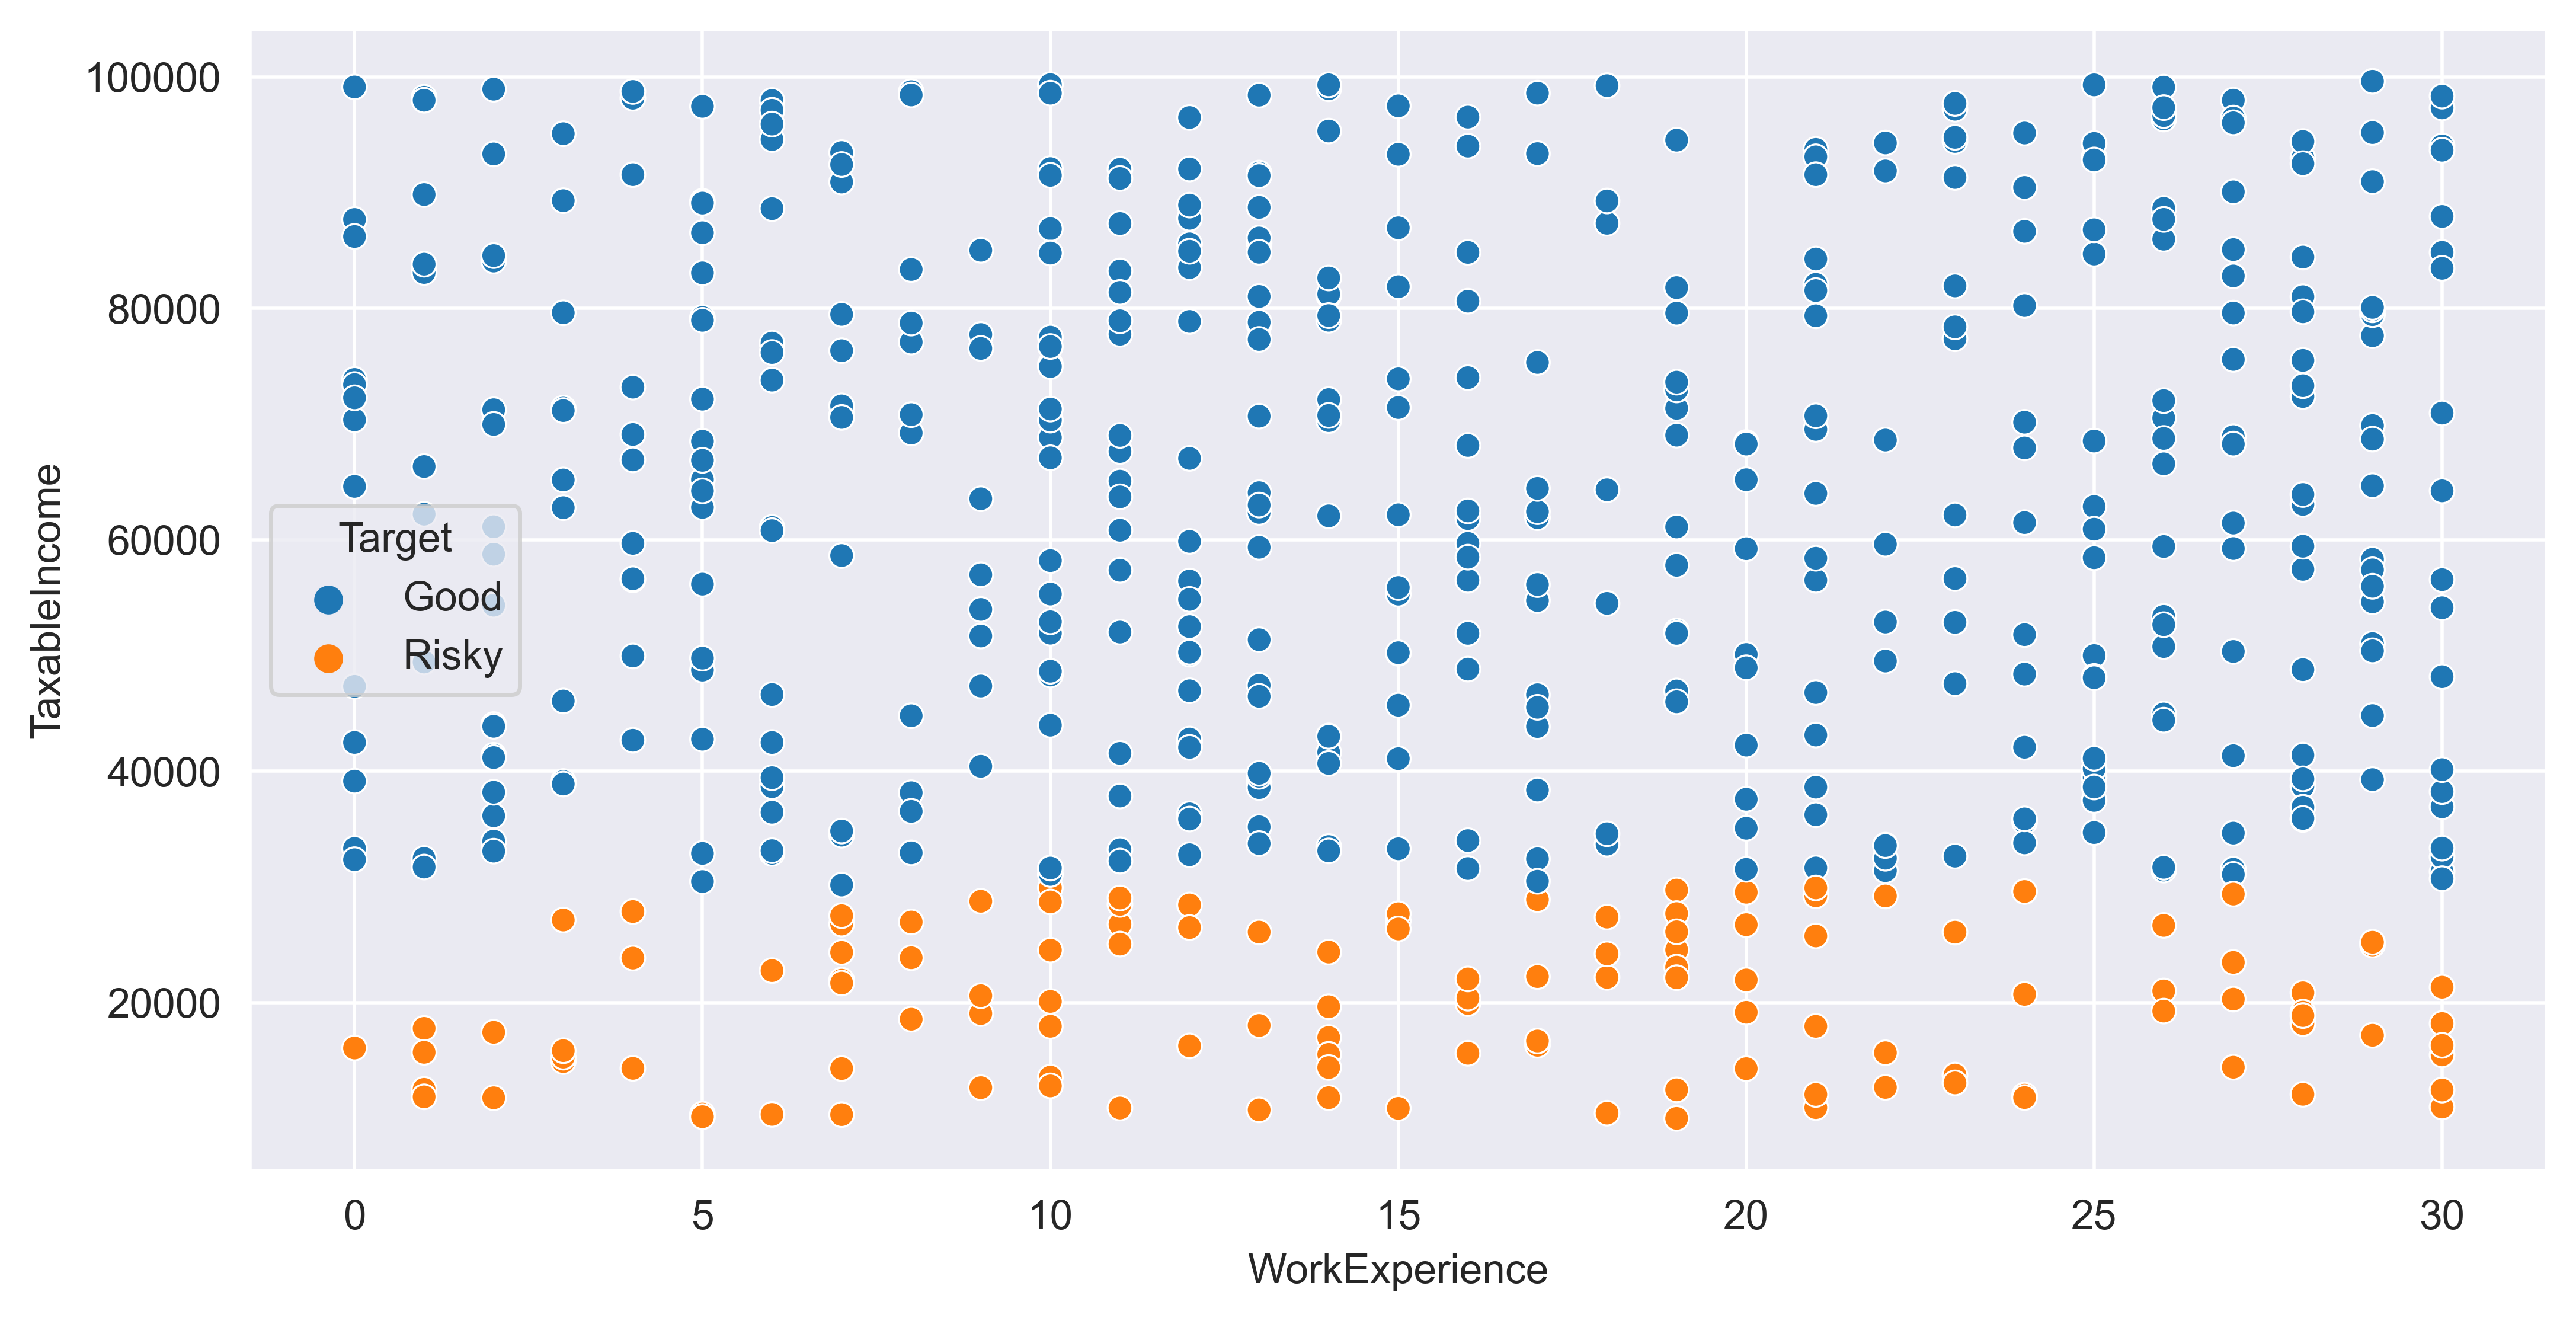

In [5]:
sns.scatterplot(x=df['WorkExperience'],y=df['TaxableIncome'],hue=df['Target'])

<AxesSubplot:xlabel='TaxableIncome', ylabel='Count'>

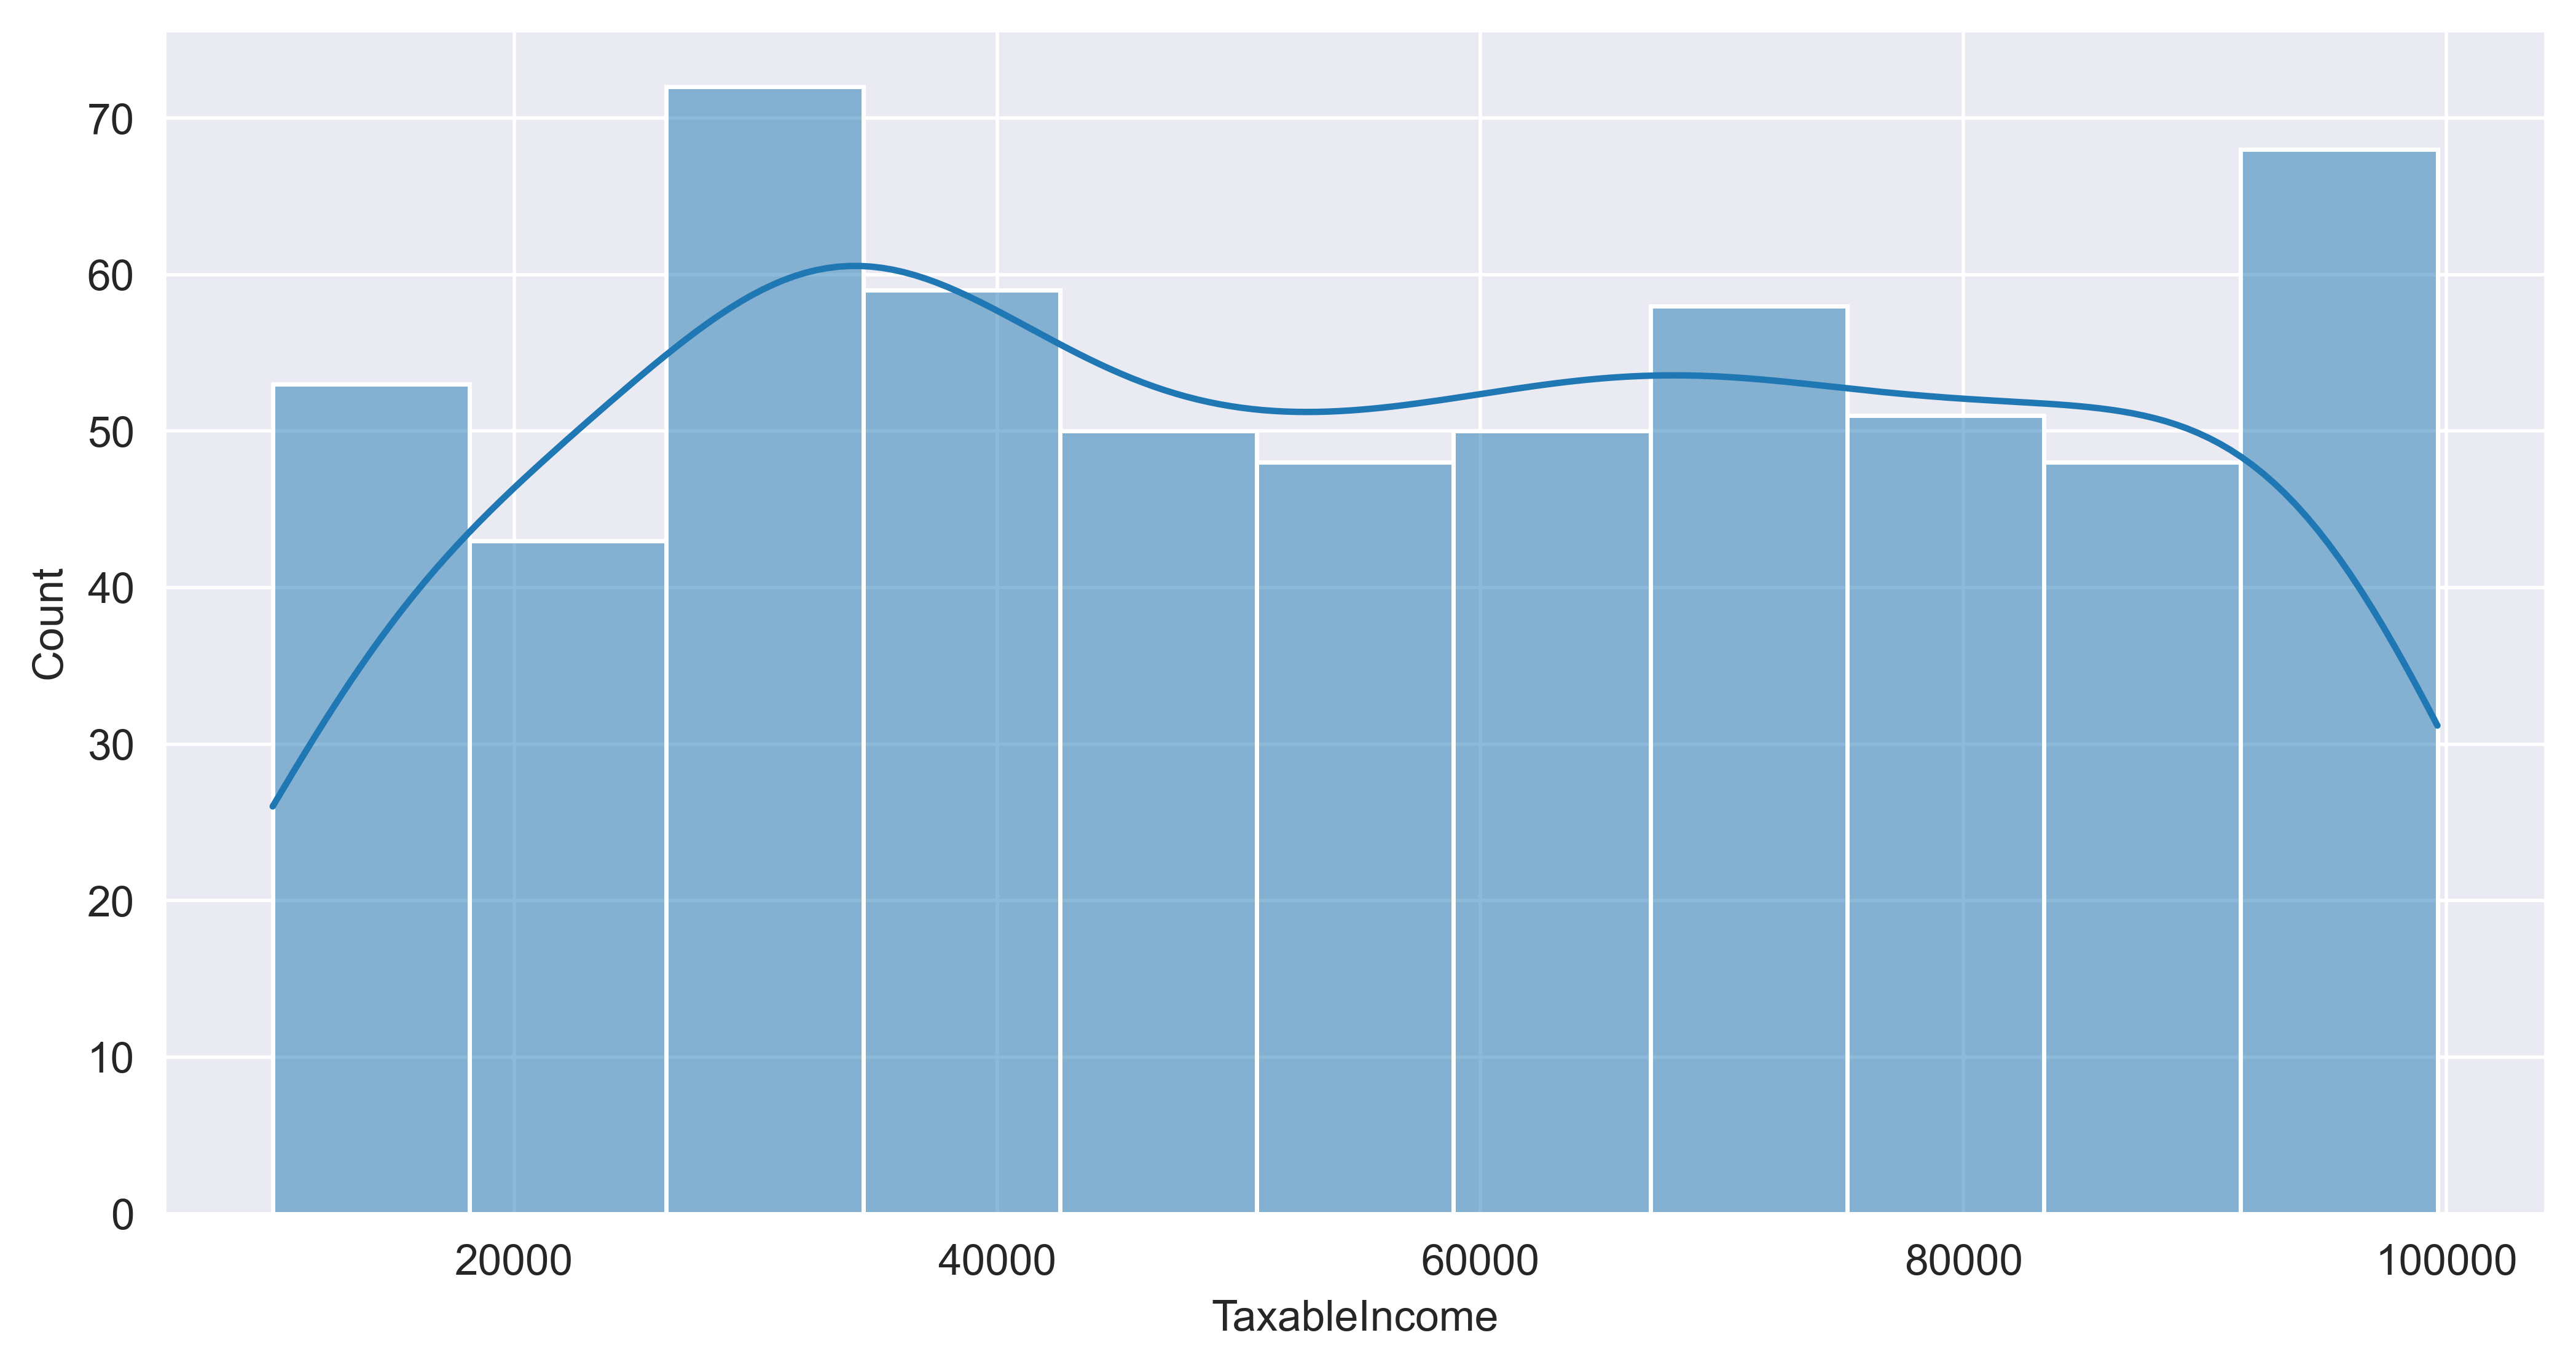

In [6]:
sns.histplot(df['TaxableIncome'],kde=True)

# Random Forest

In [7]:
x = df.iloc[:,:-1]
y=df['Target']

In [8]:
oe = OrdinalEncoder()
x[['Undergrad','MaritalStatus','Urban']] = oe.fit_transform(x[['Undergrad','MaritalStatus','Urban']])

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Model

In [10]:
dtc = RandomForestClassifier().fit(xtrain,ytrain)

In [11]:
print('Test Report')
print(classification_report(ytest,dtc.predict(xtest)))

Test Report
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [12]:
print(f"Training Accuracy is:  {dtc.score(xtrain,ytrain)}")
print(f"Training Accuracy is:  {dtc.score(xtest,ytest)}")

Training Accuracy is:  1.0
Training Accuracy is:  1.0


In [13]:
ypred  = dtc.predict(xtest)
ypred 

array(['Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',

Text(0.5, 1.0, 'Confusion Matrix')

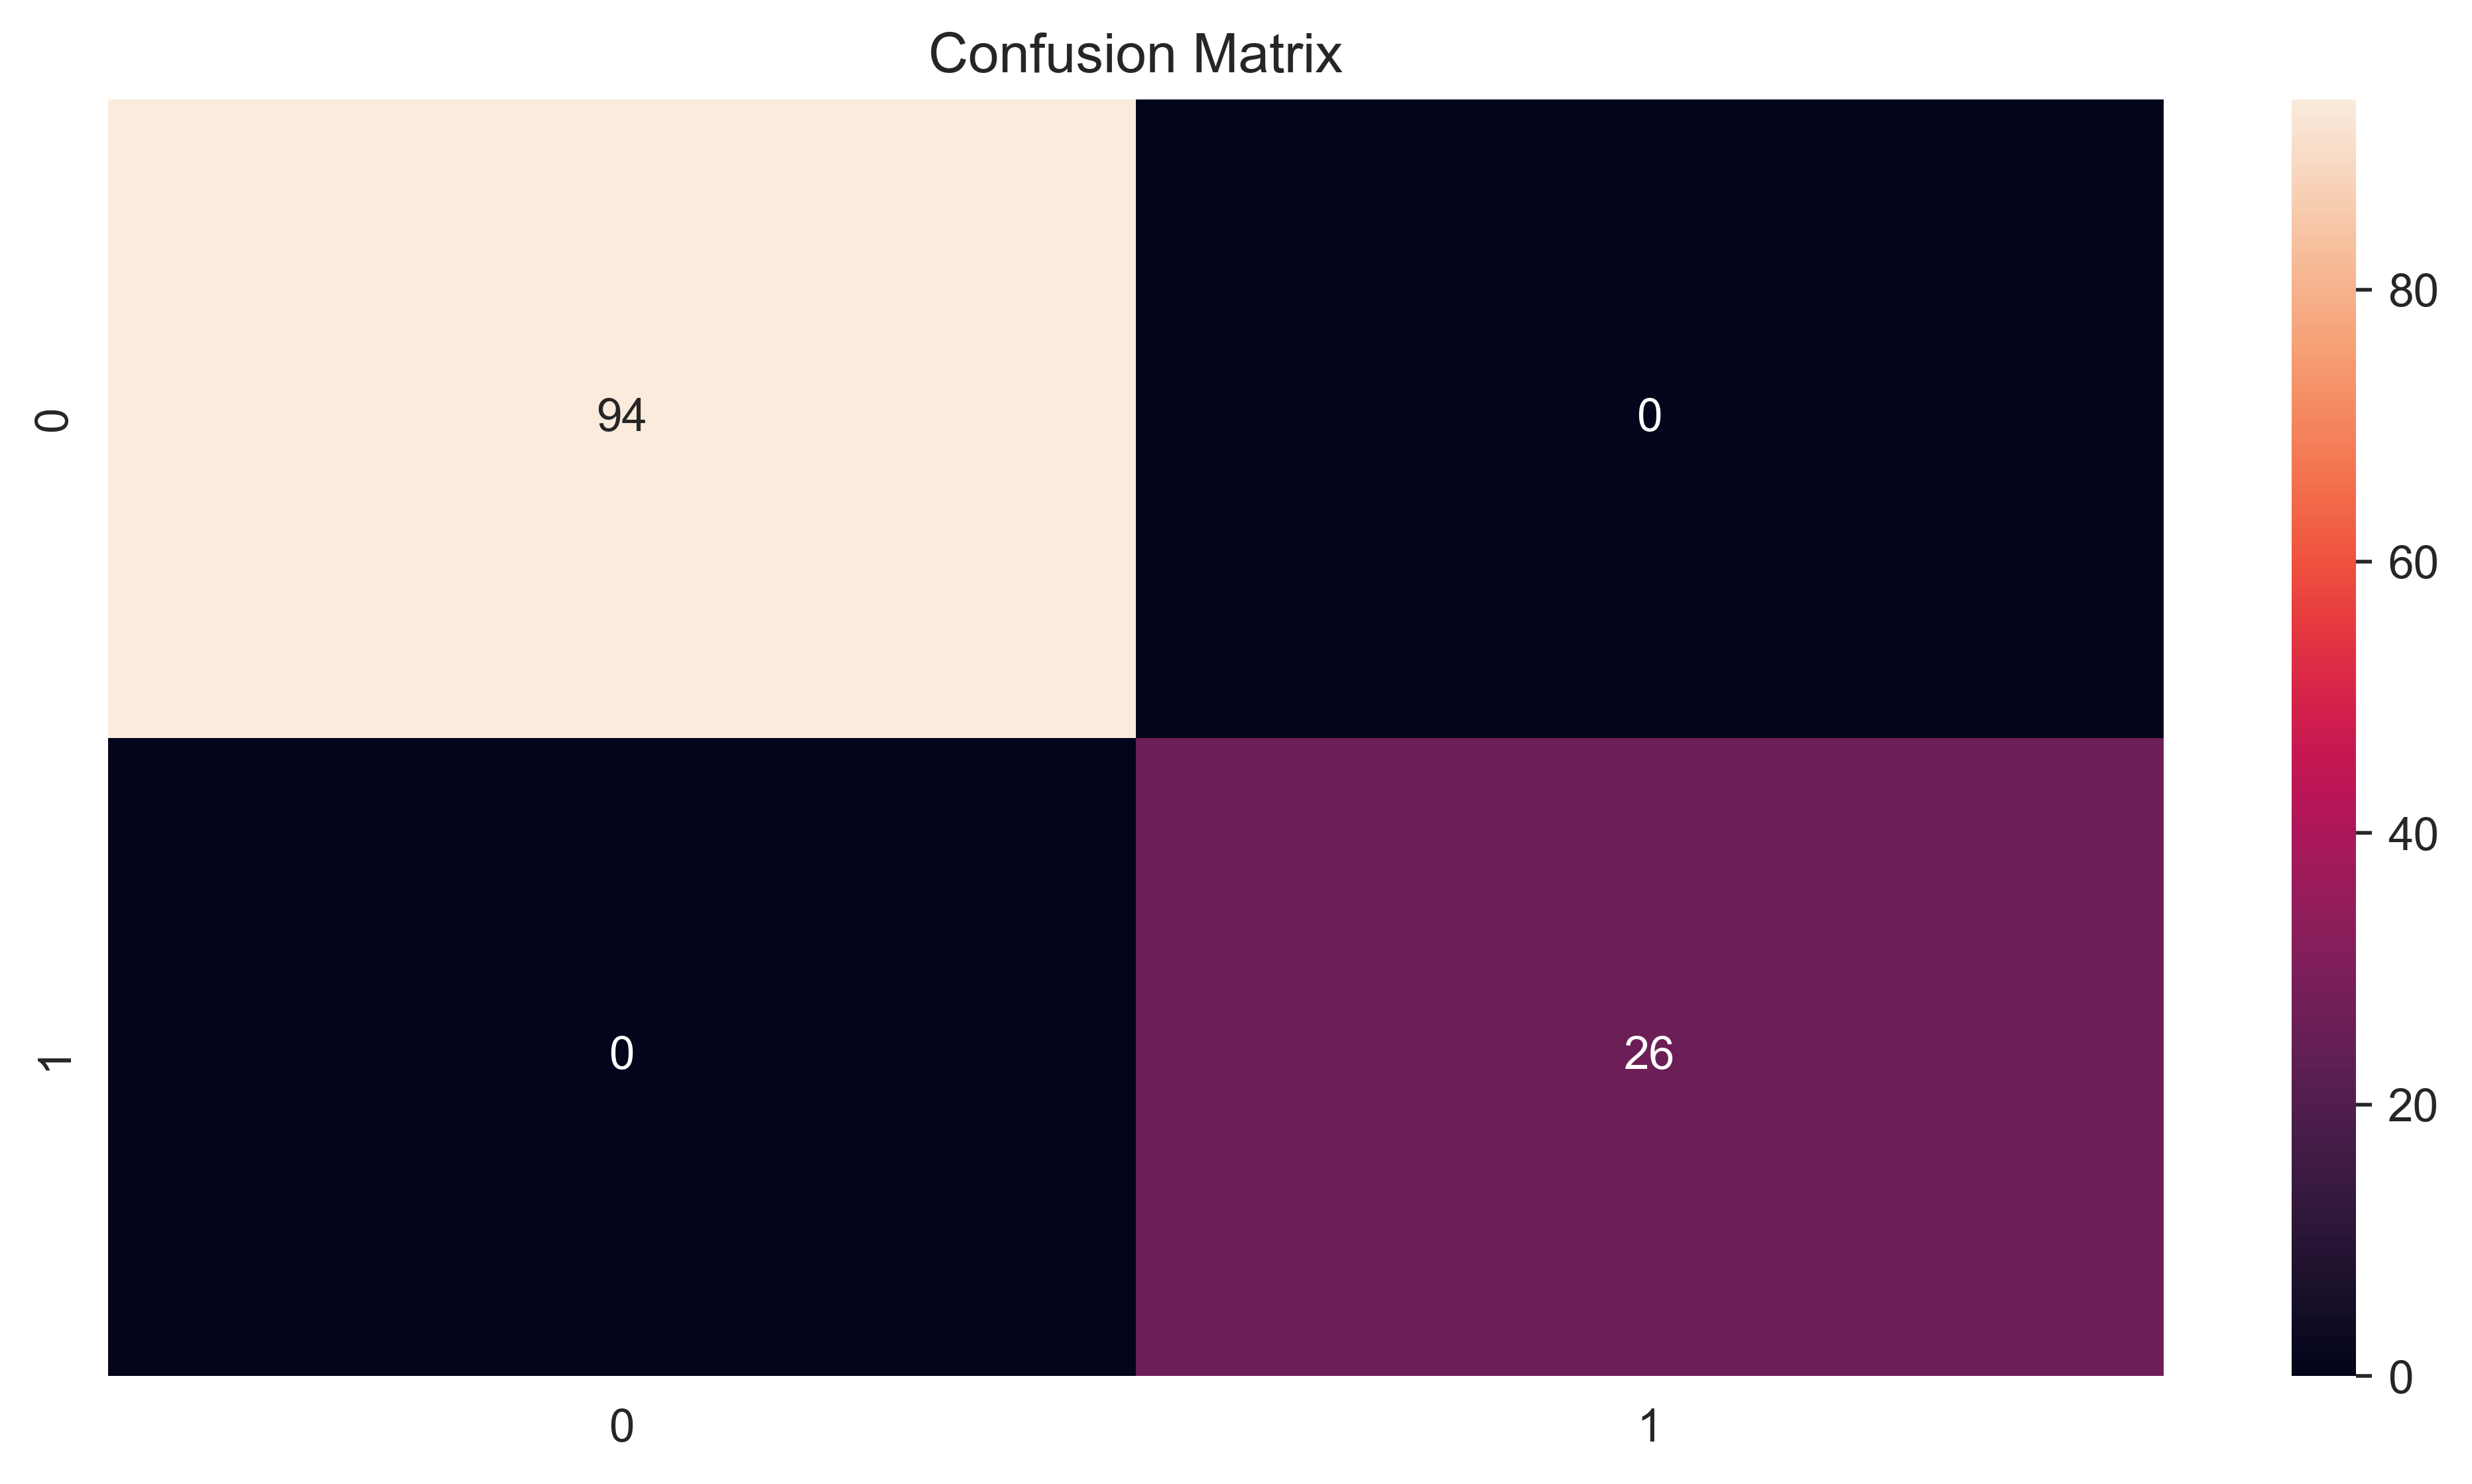

In [14]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)
plt.title('Confusion Matrix')

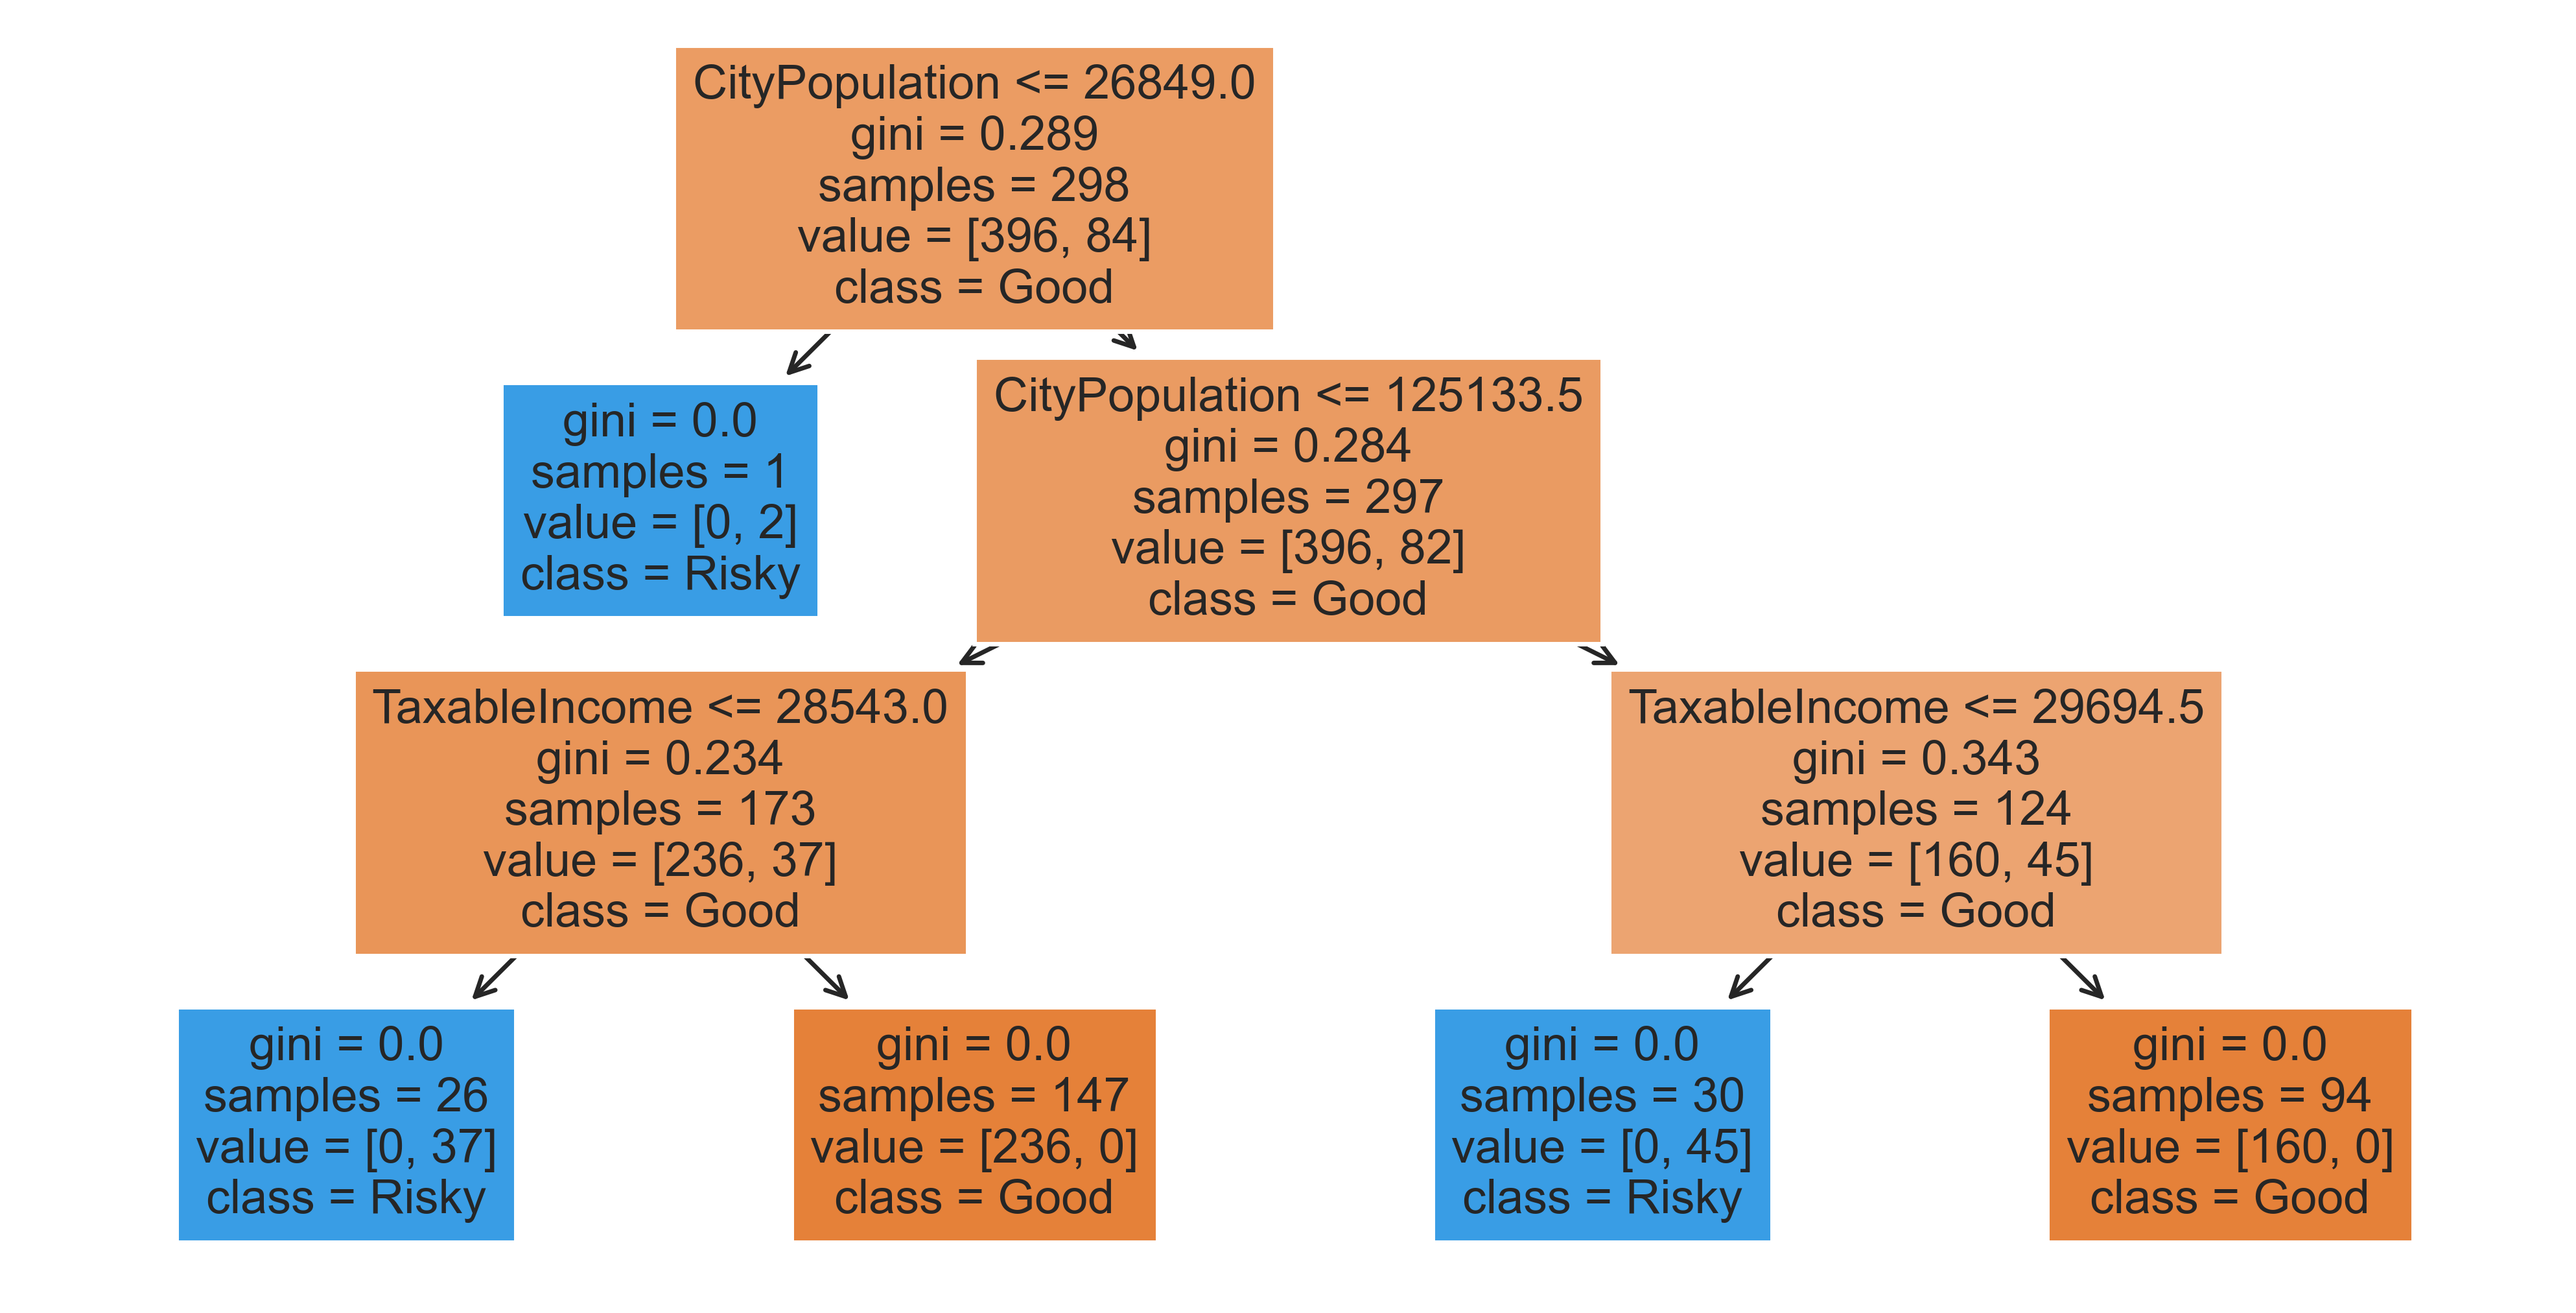

In [18]:
tree.plot_tree(dtc.estimators_[0],feature_names=x.columns,class_names=df['Target'].unique(),filled=True);

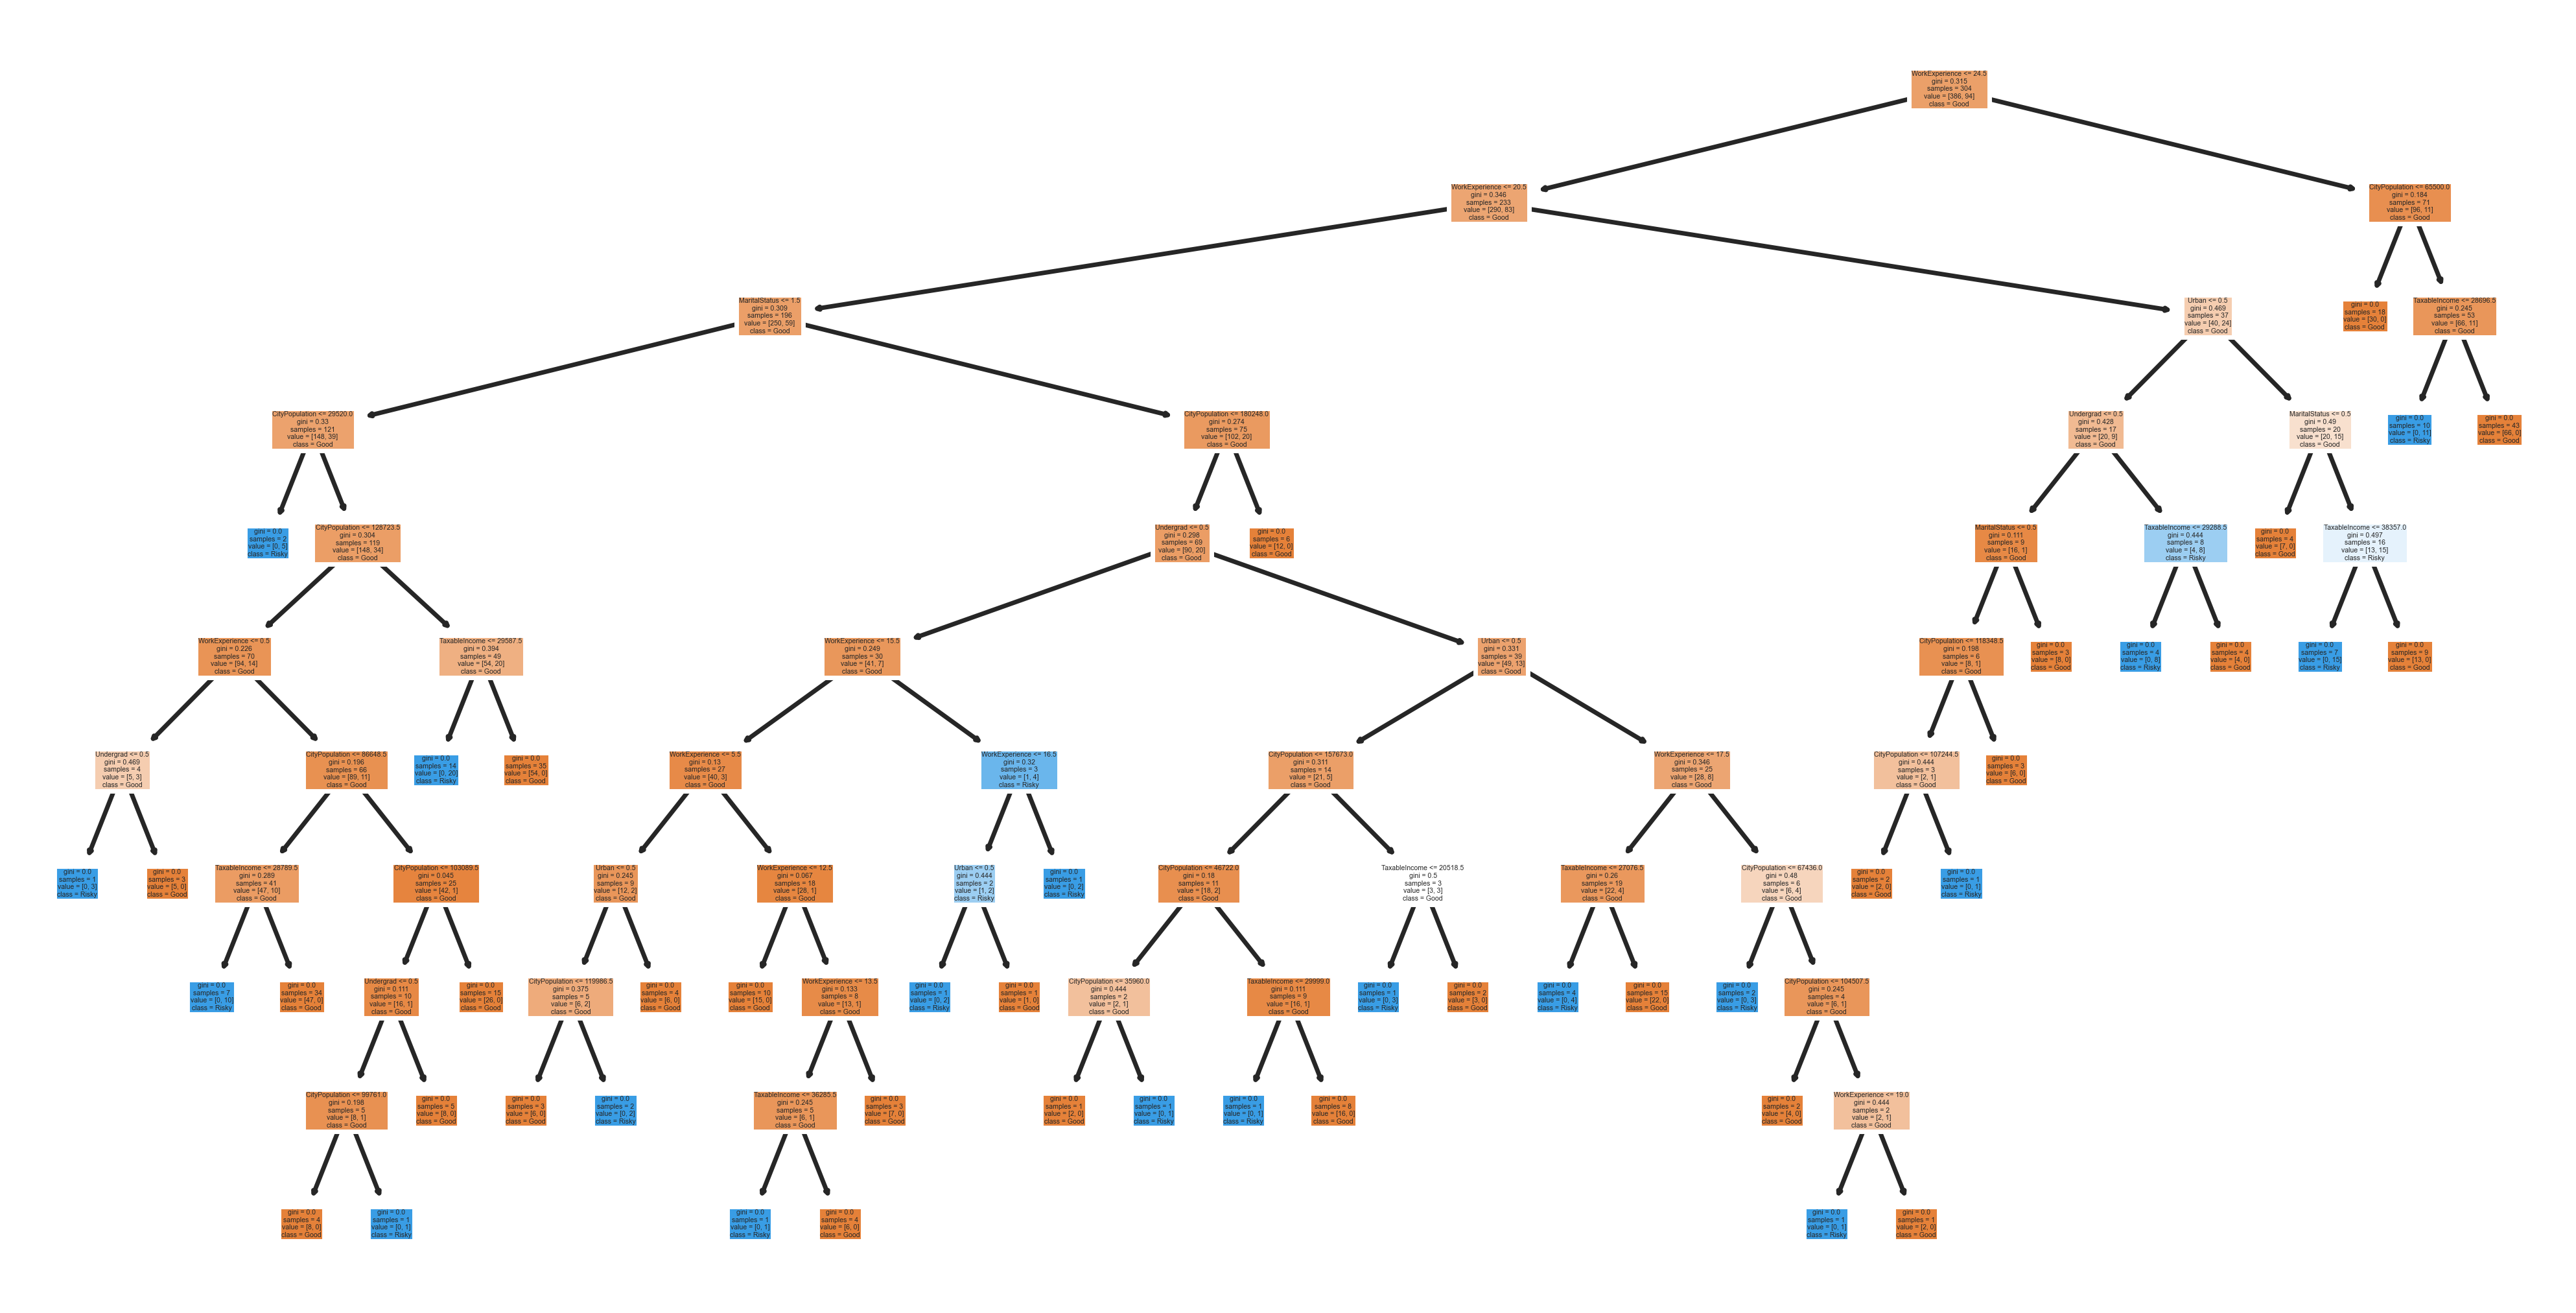

In [21]:
tree.plot_tree(dtc.estimators_[2],feature_names=x.columns,class_names=df['Target'].unique(),filled=True);

# Hyperparameter

In [22]:
params = {'n_estimators': [20,50,100,150,200,250],
         'criterion': ['log_loss','gini','entropy'],
         'max_depth' : [2,4,6,8,10,12,15,20]}
grid = GridSearchCV(RandomForestClassifier(),params,verbose=1).fit(xtrain,ytrain)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [23]:

grid.best_score_

0.9979166666666668

In [24]:

grid.best_params_

{'criterion': 'log_loss', 'max_depth': 15, 'n_estimators': 20}

In [31]:
dt_c = RandomForestClassifier(criterion= 'log_loss', max_depth= 15, n_estimators= 20).fit(xtrain,ytrain)

In [32]:
print('Training accuracy: ', dt_c.score(xtrain,ytrain))
print('Testing Accuracy: ', dt_c.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.9916666666666667
